In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spam-emails/spam.csv


In [2]:
v=pd.read_csv("/kaggle/input/spam-emails/spam.csv")
v.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
v['target']=v['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [4]:
v.head()

,Category,Message,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
import spacy
nlp=spacy.load("en_core_web_sm")


In [6]:
v['vector']=v['Message'].apply(lambda x:nlp(x).vector)
v.head()

,Category,Message,target,vector
0,ham,"Go until jurong point, crazy.. Available only ...",0,"[0.2378516, -0.4874321, 0.077918164, -0.241834..."
1,ham,Ok lar... Joking wif u oni...,0,"[0.09553135, -0.38280204, 0.015292745, -0.0927..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,"[-0.118477836, -0.3994741, 0.12717625, 0.02065..."
3,ham,U dun say so early hor... U c already then say...,0,"[0.31173036, -0.7168316, 0.01717831, 0.0519348..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,"[-0.3271392, -0.4137395, 0.2736878, -0.1019736..."


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(v['vector'],v['target'])

In [8]:

x_train,y_train=np.stack(x_train),np.stack(y_train)
x_test,y_test=np.stack(x_test),np.stack(y_test)

In [9]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [10]:
xgb.score(x_test,y_test)

0.9720028715003589

In [11]:
r=xgb.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(r,y_test)

In [12]:
cm

array([[1196,   30],
       [   9,  158]])

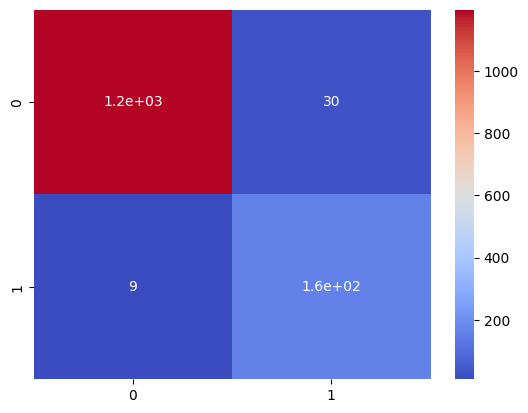

In [13]:
import seaborn as sns
r=sns.heatmap(cm,annot=True,cmap='coolwarm')